In [1]:
import pandas as pd

# Important

Jika ada hal yang dirasa abu-abu, silahkan jawab jawaban dengan asumsi logis yang anda miliki.  
Penilaian tugas tidak hanya sekedar dilihat dari hasil yang dikeluarkan, melainkan penjelasan atas langkah-langkah yang anda ambil dalam analisis. Sertakan penjelasan dengan menggunakan simbol komentar.  
Kualitas seorang Data Analyst yang baik adalah mampu menyampaikan analisis dengan baik.

Definisi data : https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset?select=events.csv  
Kita hanya akan menggunakan file events.csv jadi pastikan kalian telah memahami data dengan baik sebelum mulai mengerjakan homework ini

In [2]:
df = pd.read_csv('events.csv')
df['datetime'] = pd.to_datetime(df['timestamp'],unit='ms') # Data awalnya merupakan linux timestamp, akan dikonversikan menjadi format datetime standard pandas
df

timestamp  visitorid event  itemid  transactionid  \
0        1433221332117     257597  view  355908            NaN   
1        1433224214164     992329  view  248676            NaN   
2        1433221999827     111016  view  318965            NaN   
3        1433221955914     483717  view  253185            NaN   
4        1433221337106     951259  view  367447            NaN   
...                ...        ...   ...     ...            ...   
2756096  1438398785939     591435  view  261427            NaN   
2756097  1438399813142     762376  view  115946            NaN   
2756098  1438397820527    1251746  view   78144            NaN   
2756099  1438398530703    1184451  view  283392            NaN   
2756100  1438400163914     199536  view  152913            NaN   

                       datetime  
0       2015-06-02 05:02:12.117  
1       2015-06-02 05:50:14.164  
2       2015-06-02 05:13:19.827  
3       2015-06-02 05:12:35.914  
4       2015-06-02 05:02:17.106  
...                         ...  
2756096 2015-08-01 03:13:05.939  
2756097 2015-08-01 03:30:13.142  
2756098 2015-08-01 02:57:00.527  
2756099 2015-08-01 03:08:50.703  
2756100 2015-08-01 03:36:03.914  

[2756101 rows x 6 columns]

In [3]:
df['date_key'] = df['datetime'].dt.normalize() # mereset komponen jam pada datetime sehingga hanya menggunakan tanggal
df

timestamp  visitorid event  itemid  transactionid  \
0        1433221332117     257597  view  355908            NaN   
1        1433224214164     992329  view  248676            NaN   
2        1433221999827     111016  view  318965            NaN   
3        1433221955914     483717  view  253185            NaN   
4        1433221337106     951259  view  367447            NaN   
...                ...        ...   ...     ...            ...   
2756096  1438398785939     591435  view  261427            NaN   
2756097  1438399813142     762376  view  115946            NaN   
2756098  1438397820527    1251746  view   78144            NaN   
2756099  1438398530703    1184451  view  283392            NaN   
2756100  1438400163914     199536  view  152913            NaN   

                       datetime   date_key  
0       2015-06-02 05:02:12.117 2015-06-02  
1       2015-06-02 05:50:14.164 2015-06-02  
2       2015-06-02 05:13:19.827 2015-06-02  
3       2015-06-02 05:12:35.914 2015-06-02  
4       2015-06-02 05:02:17.106 2015-06-02  
...                         ...        ...  
2756096 2015-08-01 03:13:05.939 2015-08-01  
2756097 2015-08-01 03:30:13.142 2015-08-01  
2756098 2015-08-01 02:57:00.527 2015-08-01  
2756099 2015-08-01 03:08:50.703 2015-08-01  
2756100 2015-08-01 03:36:03.914 2015-08-01  

[2756101 rows x 7 columns]

# 1. Data Preprocessing
Data pada level transaksi dan belum siap digunakan untuk analisis harian.  
Lakukan data preprocessing dengan pandas sesuai dengan materi yang sudah ada pelajari sehingga data di rekap dalam level harian untuk setiap itemid seperti berikut : 

In [4]:
# Mengecek jumlah nilai yang hilang untuk setiap kolom
missing_data = df.isnull().sum()
missing_data

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
datetime               0
date_key               0
dtype: int64

In [5]:
df['transactionid']=df['transactionid'].fillna(0) # mengisikan NaN menjadi nol

In [6]:
cek_missing = df.isnull().sum()
cek_missing 

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
datetime         0
date_key         0
dtype: int64

- jika dilihat berdasarkan data, hanya data transaksi yang memiliki nilai NaN. 
- data yang Nan akan diisi nilai nol dengan asumsi bahwa, mereka mengunjungi event tapi tidak melakukan tansaksi

In [7]:
# Mengecek jumlah data unik di setiap kolom visitorid	itemid	transactionid
unique_counts = df[['visitorid','itemid', 'transactionid']].nunique()

print("\nJumlah data unik di setiap kolom:")
print(unique_counts)


Jumlah data unik di setiap kolom:
visitorid        1407580
itemid            235061
transactionid      17672
dtype: int64


- Terlihat bahwa antara jumlah row data dan jumlah unik visitorid berbeda. 
- hal ini menunjukkan bahwa orang yang sama dapat mengunjungi event lebih dari sekali. hal yang sama pada itemid dan transactionid
- kesimpulan: visitorid, itemid,transactionid bisa terisi angka yang sama pada baris berbeda

In [8]:
# Mengecek nilai dan jumlahnya dalam kolom 'event'
value_counts_event= df['event'].value_counts()

print("\nNilai unik dan jumlahnya dalam kolom 'event':")
print(value_counts_event)


Nilai unik dan jumlahnya dalam kolom 'event':
event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64


In [9]:
# Fungsi untuk mengelompokkan waktu berdasarkan jam
def group_time_of_day(hour):
    if 5 <= hour < 12:
        return "pagi"
    elif 12 <= hour < 17:
        return "siang"
    elif 17 <= hour < 21:
        return "sore"
    elif 21 <= hour < 24:
        return "malam"
    else:
        return "dini hari"

# Mendefinisikan kolom baru 'time_group' dengan menggunakan fungsi group_time_of_day
df['time_group'] = df['datetime'].dt.hour.apply(group_time_of_day)

# Menampilkan DataFrame hasil
df.sample(5)

timestamp  visitorid      event  itemid  transactionid  \
2648414  1437962759524     179213       view  252980            0.0   
384117   1434750513327      76757  addtocart   53636            0.0   
2548905  1437708856834     198528       view  173704            0.0   
221684   1434246881789     463213       view  278612            0.0   
2028455  1433007568900     504936       view   55978            0.0   

                       datetime   date_key time_group  
2648414 2015-07-27 02:05:59.524 2015-07-27  dini hari  
384117  2015-06-19 21:48:33.327 2015-06-19      malam  
2548905 2015-07-24 03:34:16.834 2015-07-24  dini hari  
221684  2015-06-14 01:54:41.789 2015-06-14  dini hari  
2028455 2015-05-30 17:39:28.900 2015-05-30       sore

In [10]:
# Mengubah data menjadi pivot table
df_daily_tg = df.pivot_table(index=['date_key', 'itemid','time_group'], columns='event', aggfunc='size', fill_value=0).reset_index()

# Mengganti nama kolom
df_daily_tg.columns.name = None
df_daily_tg = df_daily_tg.rename_axis(None, axis=1)
df_daily_tg

date_key  itemid time_group  addtocart  transaction  view
0       2015-05-03      16      siang          0            0     1
1       2015-05-03      19      malam          0            0     1
2       2015-05-03      32      malam          0            0     1
3       2015-05-03      33  dini hari          0            0     1
4       2015-05-03      33       sore          1            0     0
...            ...     ...        ...        ...          ...   ...
2051261 2015-09-18  464474  dini hari          0            0     2
2051262 2015-09-18  464538  dini hari          0            0     1
2051263 2015-09-18  465387  dini hari          0            0     1
2051264 2015-09-18  466321  dini hari          0            0     1
2051265 2015-09-18  466436  dini hari          0            0     1

[2051266 rows x 6 columns]

In [11]:
# Mengubah data menjadi pivot table
df_daily = df.pivot_table(index=['date_key', 'itemid'], columns='event', aggfunc='size', fill_value=0).reset_index()

# Mengganti nama kolom
df_daily.columns.name = None
df_daily = df_daily.rename_axis(None, axis=1)
df_daily

date_key  itemid  addtocart  transaction  view
0       2015-05-03      16          0            0     1
1       2015-05-03      19          0            0     1
2       2015-05-03      32          0            0     1
3       2015-05-03      33          1            0     1
4       2015-05-03      42          0            0     1
...            ...     ...        ...          ...   ...
1672181 2015-09-18  464474          0            0     2
1672182 2015-09-18  464538          0            0     1
1672183 2015-09-18  465387          0            0     1
1672184 2015-09-18  466321          0            0     1
1672185 2015-09-18  466436          0            0     1

[1672186 rows x 5 columns]

In [12]:
#melakukan pengurutan pada kolom
cols = ['view','addtocart','transaction']

df_daily = df_daily[['date_key','itemid']+cols] # melakukan pengurutan kolom
df_daily

date_key  itemid  view  addtocart  transaction
0       2015-05-03      16     1          0            0
1       2015-05-03      19     1          0            0
2       2015-05-03      32     1          0            0
3       2015-05-03      33     1          1            0
4       2015-05-03      42     1          0            0
...            ...     ...   ...        ...          ...
1672181 2015-09-18  464474     2          0            0
1672182 2015-09-18  464538     1          0            0
1672183 2015-09-18  465387     1          0            0
1672184 2015-09-18  466321     1          0            0
1672185 2015-09-18  466436     1          0            0

[1672186 rows x 5 columns]

In [13]:
# Menyiapkan data yang akan dianalisis
df_daily.sort_values('transaction')

date_key  itemid  view  addtocart  transaction
0       2015-05-03      16     1          0            0
1111440 2015-07-30   48460     1          0            0
1111439 2015-07-30   48451     1          0            0
1111438 2015-07-30   48425     2          0            0
1111436 2015-07-30   48360     1          0            0
...            ...     ...   ...        ...          ...
1463585 2015-08-30  173653    21          7            6
936990  2015-07-16  445351    42          7            6
1405839 2015-08-25  134484    17          6            6
1408811 2015-08-25  248455    45          7            6
49359   2015-05-07   51354    94          9            8

[1672186 rows x 5 columns]

In [14]:
# CODE INI JANGAN DI RUN DULU (HASIL GROWIA)
df_daily.sort_values('transaction')

date_key  itemid  view  addtocart  transaction
0       2015-05-03      16     1          0            0
1111440 2015-07-30   48460     1          0            0
1111439 2015-07-30   48451     1          0            0
1111438 2015-07-30   48425     2          0            0
1111436 2015-07-30   48360     1          0            0
...            ...     ...   ...        ...          ...
1463585 2015-08-30  173653    21          7            6
936990  2015-07-16  445351    42          7            6
1405839 2015-08-25  134484    17          6            6
1408811 2015-08-25  248455    45          7            6
49359   2015-05-07   51354    94          9            8

[1672186 rows x 5 columns]

# 2. Data Analysis
Gunakan df_daily sesuai soal nomor 1.  
Apabila tidak bisa menjawab soal nomor 1, harap gunakan file df_daily_item_activity.csv sebagai penggantinya.


## 2.a Setelah melakukan rekap harian per produk, coba lakukan rekap harian secara total.  
Rekap harian secara total artinya hitung berapa banyak total view yang terjadi, total addtocart yang terjadi dan total transaction yang terjadi di setiap harinya

In [15]:
# Melakukan rekap harian per produk
# Group by date dan itemid, lalu jumlahkan nilai biner
daily_summary = df_daily.groupby(['date_key', 'itemid']).sum().reset_index()

# Tampilkan rekap harian per produk
print("\nRekap Harian per Produk:")
daily_summary


Rekap Harian per Produk:


date_key  itemid  view  addtocart  transaction
0       2015-05-03      16     1          0            0
1       2015-05-03      19     1          0            0
2       2015-05-03      32     1          0            0
3       2015-05-03      33     1          1            0
4       2015-05-03      42     1          0            0
...            ...     ...   ...        ...          ...
1672181 2015-09-18  464474     2          0            0
1672182 2015-09-18  464538     1          0            0
1672183 2015-09-18  465387     1          0            0
1672184 2015-09-18  466321     1          0            0
1672185 2015-09-18  466436     1          0            0

[1672186 rows x 5 columns]

In [16]:
# Melakukan rekap harian total

# Group by date, lalu jumlahkan nilai biner
daily_summary_total = df_daily.groupby('date_key').sum().reset_index()

# Tampilkan rekap harian total
print("\nRekap Harian Total:")
daily_summary_total


Rekap Harian Total:


date_key      itemid   view  addtocart  transaction
0   2015-05-03  2069043371  13304        296           83
1   2015-05-04  2717916089  18681        579          154
2   2015-05-05  3181406676  22225        565          225
3   2015-05-06  3232508591  23015        647          258
4   2015-05-07  3193888544  22369        578          217
..         ...         ...    ...        ...          ...
134 2015-09-14  3054518078  20284        475          154
135 2015-09-15  2864454690  19674        595          158
136 2015-09-16  1818941835  11022        336          137
137 2015-09-17  1629461146   9830        253           45
138 2015-09-18   280365054   1479         34           15

[139 rows x 5 columns]

## 2.b Setelah membuat rekap harian secara total, buatlah visualisasi yang menggambarkan pergerakan setiap event di setiap harinya dan BERIKAN MINIMAL 2 INSIGHT/ANALISIS dari grafik.

In [17]:
# Melakukan pengecekkan apakah ada tanggal yang terlewat pada rekap harian secara total
# Membuat rangkaian tanggal lengkap dari rentang tanggal yang ada di Data
date_range = pd.date_range(start=df_daily['date_key'].min(), end=df_daily['date_key'].max())

# Menemukan tanggal yang terlewat
missing_dates = date_range.difference(df_daily['date_key'])

# Menampilkan tanggal yang terlewat
print("\nTanggal yang Terlewat:")
print(missing_dates)


Tanggal yang Terlewat:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


- Berdasarkan hasil tersebut, dapat disimpulkan tidak ada tanggal yang terlewat sehingga bisa langsung digunakan

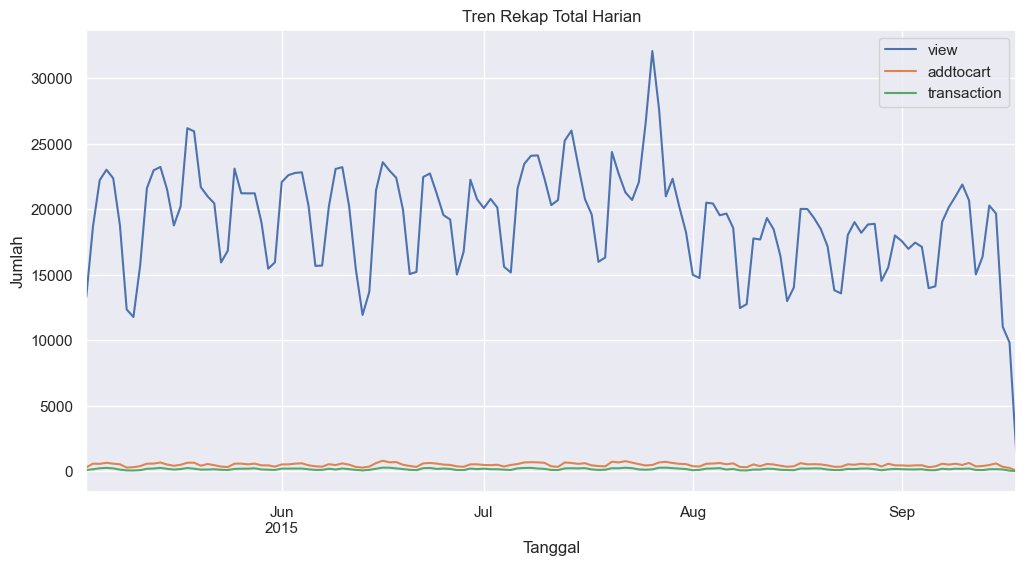

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# Kelompokkan data berdasarkan tanggal dan hitung jumlah tindakan per hari
daily_plot = daily_summary_total.groupby('date_key')[['view', 'addtocart', 'transaction']].sum()

# Visualisasi dengan line chart
sns.set(style="darkgrid")
daily_plot.plot(kind='line', figsize=(12, 6))
plt.title('Tren Rekap Total Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.grid(True)
plt.legend()
plt.show()


Insight pada plot diatas yaitu
- Jumlah visitor mengalami penurunan yang signifikan dari proses view ke addtocart. 
- padahal secara visual antara pengunjung yang melakukan transaksi dari addtochart memiliki trend yang masih sama. dari sini perlu dicaritahu lebih ada masalah apa sehingga orang orang yang berkunjung ke event mayoritas hanya view dan tidak melakukan addtocart ataupun transaksi
- Selain itu, jika dilihat berdasarkan grafik view ada kecenderungan mengalami pola seasonal. hal ini perlu dilakukan ekplorasi lebih lanjut mengenai naik turunnya.

## 2.c Apakah ada kendala dari proses addtocard hingga customer melakukan transaction? Gunakan funnel analysis untuk mencari tahu.

In [19]:
import plotly.express as px

In [20]:
# Menyiapkan datafunnel tapi sekedar data 
df_plot_funnel = df_daily[cols].sum(axis=0).to_frame('count').reset_index()
df_plot_funnel

#funnel_cols adalah variabel yang didefinisikan sebelumnya

index    count
0         view  2664312
1    addtocart    69332
2  transaction    22457

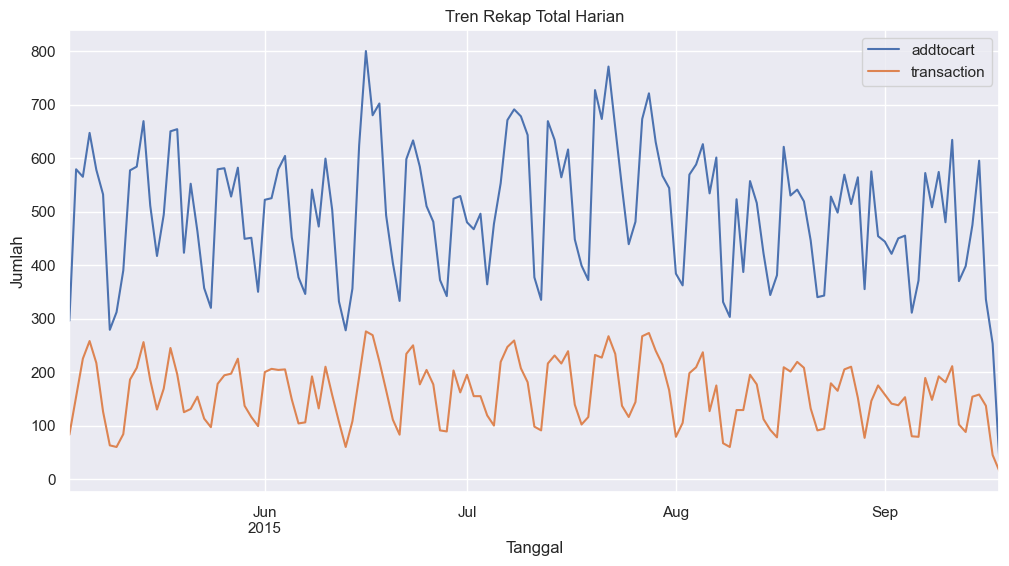

In [21]:
# Kelompokkan data berdasarkan tanggal dan hitung jumlah tindakan per hari
daily_plot = daily_summary_total.groupby('date_key')[['addtocart', 'transaction']].sum()

# Visualisasi dengan line chart
sns.set(style="darkgrid")
daily_plot.plot(kind='line', figsize=(12, 6))
plt.title('Tren Rekap Total Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.grid(True)
plt.legend()
plt.show()

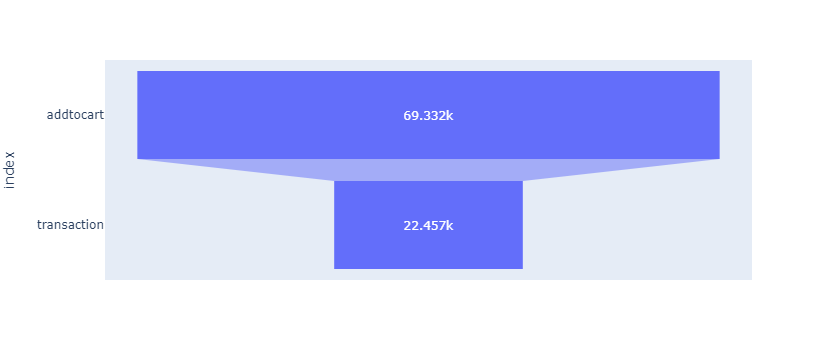

In [22]:
# Untuk membuat plot funnel
cols_2c = ['addtocart','transaction']
df_plot_funnel = df_daily[cols_2c].sum(axis=0).to_frame('count').reset_index()
fig = px.funnel(df_plot_funnel,y='index',x='count')
fig.show()

Insight:
- Berdasarkan grafik diatas, terlihat adanya pola naik-turun yang hampir mirip antara orang-orang yang melakukan addtocart dan transaksi. khususnya di akhir september penurunan orang yang melakukan addtochart tiba tiba mengalami penurunan drastis kearah trend yang sama dengan transaksi.
- dari kedua grafik diatas, jika kita asumsikan orang yang melakukan addtocart mengalami kenaikan maka akan meningkatkan potensi kenaikan juga jumlah orang yang melakukan transaksi. 
- jika pada kali ini hanya menggunakan data event saja. dari data event kita sebenarnya memiliki data timegroup dan datetime. kita akan coba melihat berdasarkan bulan, waktu, dan hari

### Ekplorasi Funnel

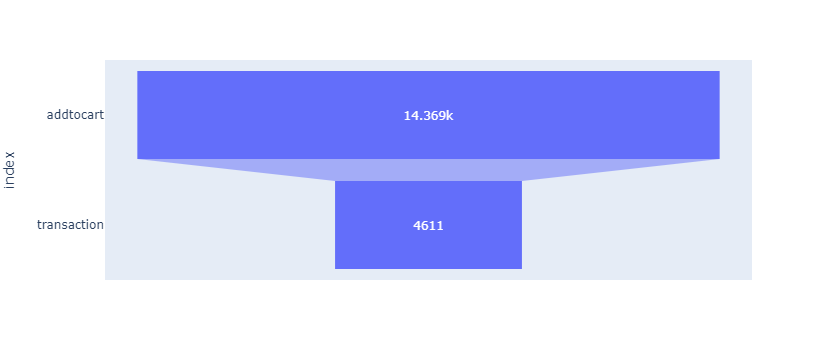

In [23]:
# Melakukan filter Bulan Mei
cols_2c = ['addtocart','transaction']
df_plot_funnel = df_daily.query("date_key<'2015-06-01'")[cols_2c].sum(axis=0).to_frame('count').reset_index()
fig = px.funnel(df_plot_funnel,y='index',x='count')
fig.show()

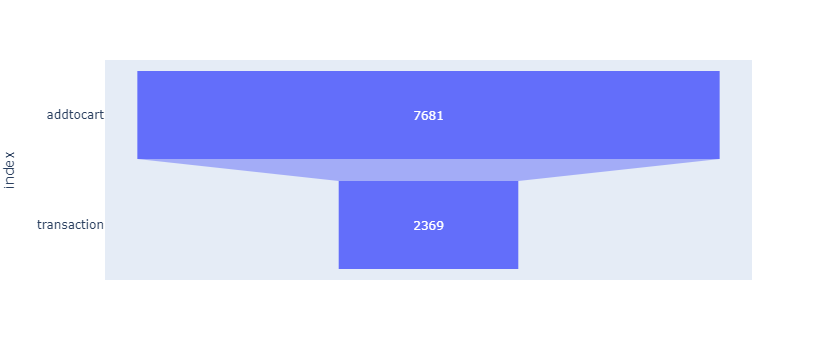

In [24]:
# Melakukan filter Bulan September
cols_2c = ['addtocart','transaction']
df_plot_funnel = df_daily.query("date_key>'2015-08-31'")[cols_2c].sum(axis=0).to_frame('count').reset_index()
fig = px.funnel(df_plot_funnel,y='index',x='count')
fig.show()

Insight dari grafik funnel:
- jika diperhatikan conversion bulan Mei lebih tinggi dibandingkan bulan September. Dari hal tersebut ada yang tidak wajar dan perlu diselidiki karena ada penurunan drastis yang terjadi

In [25]:
df_plot_funnel = df_daily[cols].sum(axis=0).to_frame('count').reset_index()
df_plot_funnel['count_from_previous'] = df_plot_funnel['count'].shift(1)

# untuk mendapatkan count from previous sebelumnya maka menggunakan shift (1)
# shift (1) artinya semua entry dalam kolom tersebut kita geser satu baris

In [26]:
# Menghitung Conversion Rate
df_plot_funnel['conversion_rate'] = df_plot_funnel['count']/df_plot_funnel['count_from_previous']
df_plot_funnel

index    count  count_from_previous  conversion_rate
0         view  2664312                  NaN              NaN
1    addtocart    69332            2664312.0         0.026022
2  transaction    22457              69332.0         0.323905

- terlihat bahwa nilai conversion_rate dari view ke addtocart sangat kecil sekitar 2,6 persen dibandingkan dari addtocart ke transaksi yang sebesar 32,39 persen.

In [30]:
# EKPLORASI FUNNEL Addtochart, Transaction
# melakukan pengelompokkan berdasarkan tanggal dan time_group
df_funnel_daily = df_daily_tg.groupby(['date_key','time_group'],as_index=False)[cols_2c].sum()
df_funnel_daily

date_key time_group  addtocart  transaction
0   2015-05-03  dini hari         51            8
1   2015-05-03      malam         77           21
2   2015-05-03       pagi         32           12
3   2015-05-03      siang         54           20
4   2015-05-03       sore         82           22
..         ...        ...        ...          ...
686 2015-09-17      malam         48            0
687 2015-09-17       pagi         17            1
688 2015-09-17      siang         52           11
689 2015-09-17       sore         72           21
690 2015-09-18  dini hari         34           15

[691 rows x 4 columns]

In [31]:
# Melakukan tahap awal sebelum melakukan plot dengan seaborn
df_funnel_daily = df_funnel_daily.melt(id_vars=['date_key','time_group'],value_vars = cols_2c,var_name='funnel',value_name='count')
df_funnel_daily

date_key time_group       funnel  count
0    2015-05-03  dini hari    addtocart     51
1    2015-05-03      malam    addtocart     77
2    2015-05-03       pagi    addtocart     32
3    2015-05-03      siang    addtocart     54
4    2015-05-03       sore    addtocart     82
...         ...        ...          ...    ...
1377 2015-09-17      malam  transaction      0
1378 2015-09-17       pagi  transaction      1
1379 2015-09-17      siang  transaction     11
1380 2015-09-17       sore  transaction     21
1381 2015-09-18  dini hari  transaction     15

[1382 rows x 4 columns]

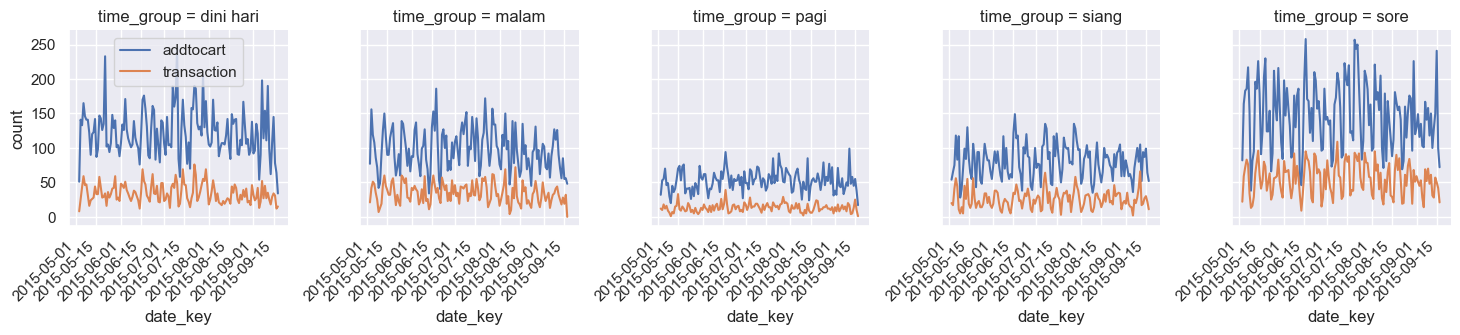

In [32]:
import seaborn as sns

# membuat plot berdasarkan time_group
g = sns.FacetGrid(df_funnel_daily, col="time_group")
g.map(sns.lineplot, "date_key", "count","funnel")

# Menampilkan legenda 
g.axes.flat[0].legend()
g.set_xticklabels(rotation=45, ha='right')

- jika kita grouping berdasarkan waktu, terlihat bahwa waktu pagi hari adalalah waktu pengunjung melakukan paling sedikit transaksi sedangkan waktu yang lebih banyak pengunjung yang melakukan transaksi terjadi pada waktu sore yang disusul pula dini hari dan kemudian malam
- Hal ini dimungkinkan waktu pagi dan siang hari adalah waktu dimana orang orang sibuk bekerja dan beraktivitas sehingga sedikit orang orang yang melakukan transaksi mereka hanya sekedar view (lihat grafik sebelumnya viewnya cenderung konstan, kecuali pada akhir september). namun bisa pula dimungkinkan waktu waktu tersebut adalah waktu dimana trafficnya tinggi sehingga perlu dicari info apakah ada masalah debug web akibat traffic tinggi.

In [33]:
# Mengelompokkan weekday dan weekand
df_funnel_daily['kategori_hari'] = df_funnel_daily['date_key'].dt.weekday.apply(lambda x: 'weekend' if x >= 5 else 'weekday')
df_funnel_daily

date_key time_group       funnel  count kategori_hari
0    2015-05-03  dini hari    addtocart     51       weekend
1    2015-05-03      malam    addtocart     77       weekend
2    2015-05-03       pagi    addtocart     32       weekend
3    2015-05-03      siang    addtocart     54       weekend
4    2015-05-03       sore    addtocart     82       weekend
...         ...        ...          ...    ...           ...
1377 2015-09-17      malam  transaction      0       weekday
1378 2015-09-17       pagi  transaction      1       weekday
1379 2015-09-17      siang  transaction     11       weekday
1380 2015-09-17       sore  transaction     21       weekday
1381 2015-09-18  dini hari  transaction     15       weekday

[1382 rows x 5 columns]

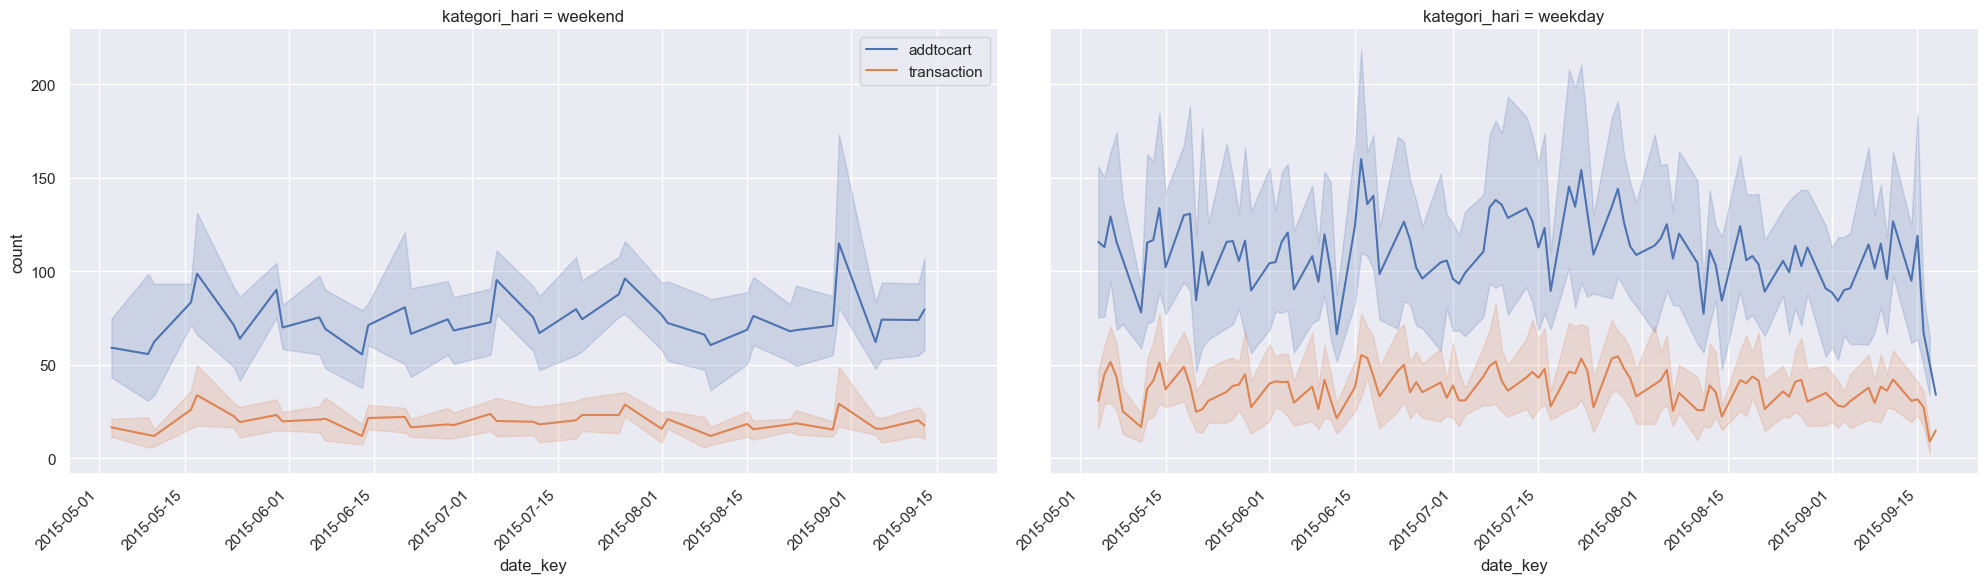

In [34]:
import matplotlib.ticker as ticker

# membuat plot berdasarkan kategori hari
g = sns.FacetGrid(df_funnel_daily, col="kategori_hari", height=6, aspect=1.67)
g.map(sns.lineplot, "date_key", "count","funnel")

# Menampilkan legenda 
g.axes.flat[0].legend()
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kesimpulan:
- Berdasarkan jenis waktu
    - pagi hari adalalah waktu pengunjung melakukan paling sedikit transaksi
    - sedangkan waktu yang lebih banyak pengunjung yang melakukan transaksi terjadi pada waktu sore yang disusul pula dini hari dan kemudian malam
Hal ini dimungkinkan waktu pagi dan siang hari adalah waktu dimana orang orang sibuk bekerja dan beraktivitas sehingga sedikit orang orang yang melakukan transaksi mereka hanya sekedar view (lihat grafik sebelumnya viewnya cenderung konstan, kecuali pada akhir september). namun bisa pula dimungkinkan waktu waktu tersebut adalah waktu dimana trafficnya tinggi sehingga perlu dicari info lebih lanjut dari data lain apakah ada masalah debug web akibat traffic tinggi.
---
- Berdasarkan Bulan
  - conversion bulan Mei lebih tinggi dibandingkan bulan September. Dari hal tersebut ada yang tidak wajar dan perlu diselidiki karena ada penurunan drastis yang terjadi khususnya pada akhir september
---
- berdasarkan kategori hari weekend or weekday
  - secara visual, waktu weekday lebih banyak pengunjung yang melakukan transaksi dibandingkan dengan waktu weekend padahal weekend biasanya menunjukkan waktu orang-orang bersantai dan banyak memiliki waktu luang dibandingkan weekday (hari kerja). Hal ini menambah asumsi kemungkinan apakah ada kaitannya dengan trafic dimana jika waktu weekend diasumsikan traffic tinggi. dan traffic tinggi sering menimbulkan masalah debug atau loading yang terlalu lama pada web. perlu dicari info tambahan selain data event ini misal waktu campaign, usia pengunjung, akses device yang digunakan, income, atau pekerjaan

# 3. RF Analysis

Karena pada data ini tidak ada informasi mengenai nilai dari item yang dibeli, maka analisis akan mengabaikan komponen M.


## 3.a Hitunglah sudah berapa hari sejak customer terakhir kali melakukan transaksi. 
Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa hari sejak transaksi berlalu

In [38]:
# Memfilter hanya baris dengan kategori 'transaction' untuk mendapat dataframe yang melakukan transaksi
df_rf = df.loc[df['event'] == 'transaction']
df_rf

timestamp  visitorid        event  itemid  transactionid  \
130      1433222276276     599528  transaction  356475         4000.0   
304      1433193500981     121688  transaction   15335        11117.0   
418      1433193915008     552148  transaction   81345         5444.0   
814      1433176736375     102019  transaction  150318        13556.0   
843      1433174518180     189384  transaction  310791         7244.0   
...                ...        ...          ...     ...            ...   
2755294  1438377176570    1050575  transaction   31640         8354.0   
2755349  1438379878779     861299  transaction  456602         3643.0   
2755508  1438357730123     855941  transaction  235771         4385.0   
2755603  1438355560300     548772  transaction   29167        13872.0   
2755607  1438358989163    1051054  transaction  312728        17579.0   

                       datetime   date_key time_group  
130     2015-06-02 05:17:56.276 2015-06-02       pagi  
304     2015-06-01 21:18:20.981 2015-06-01      malam  
418     2015-06-01 21:25:15.008 2015-06-01      malam  
814     2015-06-01 16:38:56.375 2015-06-01      siang  
843     2015-06-01 16:01:58.180 2015-06-01      siang  
...                         ...        ...        ...  
2755294 2015-07-31 21:12:56.570 2015-07-31      malam  
2755349 2015-07-31 21:57:58.779 2015-07-31      malam  
2755508 2015-07-31 15:48:50.123 2015-07-31      siang  
2755603 2015-07-31 15:12:40.300 2015-07-31      siang  
2755607 2015-07-31 16:09:49.163 2015-07-31      siang  

[22457 rows x 8 columns]

In [39]:
# cek nilai NaN
df_rf.isna().sum()

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
datetime         0
date_key         0
time_group       0
dtype: int64

In [40]:
# mengetahui tanggal latestnya
df_rf['datetime'].max()

Timestamp('2015-09-18 02:43:12.017000')

In [41]:
# pastikan melakukan sort data berdasarkan data yang paling lama hingga yang paling terbaru
df_rf.sort_values('datetime').groupby('visitorid').tail(1)

timestamp  visitorid        event  itemid  transactionid  \
1465072  1430623641391     869008  transaction   40685         9765.0   
1463096  1430624101772     345781  transaction  438400         1016.0   
1464289  1430625707591     586756  transaction  440917        10942.0   
1463462  1430626058961     435495  transaction  175893         6173.0   
1464041  1430627474950     266417  transaction  301359        12546.0   
...                ...        ...          ...     ...            ...   
1456595  1442537989072     751256  transaction  241715         7217.0   
1460839  1442538378154    1298462  transaction  358348         5741.0   
1457781  1442540841770      62004  transaction  312594         5739.0   
1457810  1442541011262     427756  transaction  342659        13143.0   
1454084  1442544192017     152963  transaction   21970         8904.0   

                       datetime   date_key time_group  
1465072 2015-05-03 03:27:21.391 2015-05-03  dini hari  
1463096 2015-05-03 03:35:01.772 2015-05-03  dini hari  
1464289 2015-05-03 04:01:47.591 2015-05-03  dini hari  
1463462 2015-05-03 04:07:38.961 2015-05-03  dini hari  
1464041 2015-05-03 04:31:14.950 2015-05-03  dini hari  
...                         ...        ...        ...  
1456595 2015-09-18 00:59:49.072 2015-09-18  dini hari  
1460839 2015-09-18 01:06:18.154 2015-09-18  dini hari  
1457781 2015-09-18 01:47:21.770 2015-09-18  dini hari  
1457810 2015-09-18 01:50:11.262 2015-09-18  dini hari  
1454084 2015-09-18 02:43:12.017 2015-09-18  dini hari  

[11719 rows x 8 columns]

In [42]:
# Recency
latest_date = df_rf['datetime'].max()
latest_visitorid = df_rf.sort_values('datetime').groupby('visitorid').tail(1)
latest_visitorid['days_since_last_transaction'] = latest_date - latest_visitorid['datetime']
latest_visitorid['days_since_last_transaction']

1465072   137 days 23:15:50.626000
1463096   137 days 23:08:10.245000
1464289   137 days 22:41:24.426000
1463462   137 days 22:35:33.056000
1464041   137 days 22:11:57.067000
                    ...           
1456595     0 days 01:43:22.945000
1460839     0 days 01:36:53.863000
1457781     0 days 00:55:50.247000
1457810     0 days 00:53:00.755000
1454084            0 days 00:00:00
Name: days_since_last_transaction, Length: 11719, dtype: timedelta64[ns]

In [43]:
# mengubah timedelta menjadi integer
latest_visitorid['days_since_last_transaction'] = latest_visitorid['days_since_last_transaction'].dt.days 
latest_visitorid = latest_visitorid.loc[:, ['visitorid', 'days_since_last_transaction']]
latest_visitorid

visitorid  days_since_last_transaction
1465072     869008                          137
1463096     345781                          137
1464289     586756                          137
1463462     435495                          137
1464041     266417                          137
...            ...                          ...
1456595     751256                            0
1460839    1298462                            0
1457781      62004                            0
1457810     427756                            0
1454084     152963                            0

[11719 rows x 2 columns]

## 3.b berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan aspek waktu transaksi terakhir.

In [44]:
# Menentukan R_Score 1-4
df_recency = latest_visitorid[['visitorid','days_since_last_transaction']]
df_recency['R_score'] = pd.qcut(df_recency['days_since_last_transaction'],4,labels=['4','3','2','1'])

In [45]:
# Mendapatkan informasi deskripsi summary pada df recency
df_recency.groupby('R_score').agg({'days_since_last_transaction':['min','max','mean','median','count']})

C:\Users\jufor\AppData\Local\Temp\ipykernel_29108\1981636655.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



days_since_last_transaction                              
                                min  max        mean median count
R_score                                                          
4                                 0   37   18.799933   19.0  2984
3                                38   70   54.522445   54.0  2896
2                                71  104   86.728224   87.0  2962
1                               105  137  120.845325  121.0  2877

R_score
- 1: Very Long
- 2: Long
- 3: Normal
- 4: Recent

In [46]:
# Hasil sintax sendiri
df_recency

visitorid  days_since_last_transaction R_score
1465072     869008                          137       1
1463096     345781                          137       1
1464289     586756                          137       1
1463462     435495                          137       1
1464041     266417                          137       1
...            ...                          ...     ...
1456595     751256                            0       4
1460839    1298462                            0       4
1457781      62004                            0       4
1457810     427756                            0       4
1454084     152963                            0       4

[11719 rows x 3 columns]

In [82]:
# CONTOH HASIL (GROWIA)
latest_transaction

visitorid  days_since_last_transaction R_score
1465072     869008                          138       1
1463096     345781                          138       1
1464289     586756                          138       1
1463462     435495                          138       1
1464041     266417                          138       1
...            ...                          ...     ...
1456595     751256                            0       4
1460839    1298462                            0       4
1457781      62004                            0       4
1457810     427756                            0       4
1454084     152963                            0       4

[11719 rows x 3 columns]

# 3.c Hitunglah banyaknya transaksi yang dilakukan oleh setiap uservisitor 
Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa banyak transaksi yang telah dilakukan

In [47]:
df_frequency= df_rf.groupby('visitorid')['transactionid'].count().reset_index(name='total_transaksi')
df_frequency.sort_values('total_transaksi')

visitorid  total_transaksi
5859     718314                1
7308     888465                1
7311     888593                1
7312     888717                1
7313     888739                1
...         ...              ...
7076     861299              188
5618     684514              189
4323     530559              286
1250     152963              349
9541    1150086              559

[11719 rows x 2 columns]

In [48]:
# Mengecek apakah sudah sesuai
df[(df['visitorid'] == 152963) & (df['event'] == 'transaction')]

timestamp  visitorid        event  itemid  transactionid  \
643545   1438641710986     152963  transaction   57723         7838.0   
646237   1438647192720     152963  transaction   38394         4307.0   
648150   1438652066119     152963  transaction  231482        14575.0   
649586   1438622189561     152963  transaction  358428        12627.0   
650241   1438632911677     152963  transaction  396853         6264.0   
...                ...        ...          ...     ...            ...   
1458912  1442502662163     152963  transaction  206767        12673.0   
1460902  1442537103196     152963  transaction  302559         2553.0   
1462071  1442504732544     152963  transaction  255919        13895.0   
1462449  1442542096481     152963  transaction  122984         5772.0   
1462450  1442542096481     152963  transaction  334401         5772.0   

                       datetime   date_key time_group  
643545  2015-08-03 22:41:50.986 2015-08-03      malam  
646237  2015-08-04 00:13:12.720 2015-08-04  dini hari  
648150  2015-08-04 01:34:26.119 2015-08-04  dini hari  
649586  2015-08-03 17:16:29.561 2015-08-03       sore  
650241  2015-08-03 20:15:11.677 2015-08-03       sore  
...                         ...        ...        ...  
1458912 2015-09-17 15:11:02.163 2015-09-17      siang  
1460902 2015-09-18 00:45:03.196 2015-09-18  dini hari  
1462071 2015-09-17 15:45:32.544 2015-09-17      siang  
1462449 2015-09-18 02:08:16.481 2015-09-18  dini hari  
1462450 2015-09-18 02:08:16.481 2015-09-18  dini hari  

[349 rows x 8 columns]

# 3.d berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan banyaknya transaksi yang dilakukan

In [49]:
# Menentukan F_Score 1-4
df_frequency = df_frequency[['visitorid','total_transaksi']]
bins = [0, 25, 50, 100, float('inf')]
labels = [1, 2, 3, 4]
df_frequency['F_score'] = pd.cut(df_frequency['total_transaksi'],bins=bins, labels=labels, right=False)

In [120]:
df_frequency.groupby('F_score').agg({'total_transaksi':['min','max','mean','median','count']})

C:\Users\jufor\AppData\Local\Temp\ipykernel_15408\518399313.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



total_transaksi                              
                    min  max       mean median  count
F_score                                              
1                     1   24    1.46443    1.0  11653
2                    25   48   35.80000   35.5     30
3                    50   94   66.85000   63.0     20
4                   100  559  186.31250  140.5     16

F_score
- 1: Very Low
- 2: Low
- 3: Medium
- 4: High

# 3.e gabungkan hasil 3.b dan 3.d kedalam suatu dataframe dan lakukan analisis mengenai karakteristik customers dari aspek RF. Apa yang bisa disimpulkan ?

In [50]:
df_frequency.sample(5)

visitorid  total_transaksi F_score
7417     900369                1       1
3335     407800                1       1
254       32787                2       1
8906    1076366               20       1
4746     577262                8       1

In [51]:
df_recency.sample(5)

visitorid  days_since_last_transaction R_score
163168     1219635                          101       2
1322672     104260                            8       4
924469      320272                           30       4
788541     1324948                           37       4
257175      813387                           97       2

In [52]:
# Meembuat kedua data diatas dengan format index yang seragam
df_recency.set_index('visitorid', inplace=True)
df_frequency.set_index('visitorid', inplace=True)

recency = df_recency['R_score']
frequency = df_frequency['F_score']

In [53]:
#Menggabungkan data
# axis 1 menggabungkannya kesamping, jadi mencocokkan dengan customer id
dt_rf = pd.concat([recency,frequency],axis=1)
dt_rf

R_score F_score
visitorid                
869008          1       1
345781          1       1
586756          1       1
435495          1       1
266417          1       1
...           ...     ...
751256          4       1
1298462         4       1
62004           4       1
427756          4       1
152963          4       4

[11719 rows x 2 columns]

### Asumsi Pembagian RF
F_score
- 1: Very Low
- 2: Low
- 3: Medium
- 4: High

R_score
- 1: Very Long
- 2: Long
- 3: Normal
- 4: Recent
---
- Top Customer: 44 (Recent-High)
  - Kriteria ini mengidentifikasi pelanggan yang aktif (transaksi baru-baru ini dan frekuensi tinggi) serta memberikan kontribusi signifikan terhadap pendapatan (nilai transaksi tinggi).
---   
- New Customer: 42 (Recent-Low) or 41 (Recent-Very Low)
  - Kriteria ini mengidentifikasi pelanggan baru yang baru saja melakukan transaksi tetapi belum menunjukkan aktivitas transaksi yang tinggi atau kontribusi nilai transaksi yang signifikan.
---
- Loyal Customer: 43 (Recent-Medium) or 33 (Normal-Medium)
  - Kriteria ini mengidentifikasi pelanggan yang konsisten melakukan transaksi dalam jangka waktu tertentu dengan frekuensi dan nilai transaksi yang stabil.
---
- Potensial Customer: 32 (Normal-Low)
  Kriteria ini mengidentifikasi pelanggan yang waktu transaksinya terbilang normal namun jumlahnya masih sedikit
---
- Lainnya
  Ini mencakup pelanggan yang tidak memenuhi kriteria khusus untuk kategori top customer, customer loyal, new customer, atau potensial customer.
  

---
Asumsi Analisis
1. Melakukan visualisasi untuk jenis customer berdasarkan kategori transaksi weekend/weekday
2. Membangkitkan top customer, customer loyal, dan potensial customer. semisal campaignya sukses, berapa total transaksi yang bisa dihasilkan selama 1 bulan kedepan
---

In [54]:
# Mapping untuk penggantian nilai
score_mapping_R = {
    '1': 'Very Long',
    '2': 'Long',
    '3': 'Normal',
    '4': 'Recent'
}

# Mapping untuk penggantian nilai
score_mapping_F = {
    1: 'Very Low',
    2: 'Low',
    3: 'Medium',
    4: 'High'
}
# Mengganti nilai kategori dengan string yang diinginkan
dt_rf['R_score'] = dt_rf['R_score'].replace(score_mapping_R)
dt_rf['F_score'] = dt_rf['F_score'].replace(score_mapping_F)

# Menampilkan DataFrame setelah perubahan
dt_rf

C:\Users\jufor\AppData\Local\Temp\ipykernel_29108\1389278270.py:17: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

C:\Users\jufor\AppData\Local\Temp\ipykernel_29108\1389278270.py:18: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



R_score   F_score
visitorid                     
869008     Very Long  Very Low
345781     Very Long  Very Low
586756     Very Long  Very Low
435495     Very Long  Very Low
266417     Very Long  Very Low
...              ...       ...
751256        Recent  Very Low
1298462       Recent  Very Low
62004         Recent  Very Low
427756        Recent  Very Low
152963        Recent      High

[11719 rows x 2 columns]

In [55]:
# Mengklasifikasikan data hasil gabungan RF
# Fungsi untuk mengklasifikasikan jenis pelanggan berdasarkan R_score dan F_score
def classify_customer(row):
    R = row['R_score']
    F = row['F_score']
    
    if R == 'Recent' and F == 'High':
        return 'Top Customer'
    elif R == 'Recent' and (F == 'Low' or F == 'Very Low'):
        return 'New Customer'
    elif (R == 'Recent' and F == 'Medium') or (R == 'Normal' and F == 'Medium'):
        return 'Loyal Customer'
    elif (R == 'Normal' and F == 'Low'):
        return 'Potential Customer'
    else:
        return 'Other'

# Menambahkan kolom klasifikasi customer
dt_rf['customer_type'] = dt_rf.apply(classify_customer, axis=1)

# Menampilkan hasil
dt_rf. sample(5)

R_score   F_score customer_type
visitorid                                   
833719     Very Long  Very Low         Other
504204          Long  Very Low         Other
1205233         Long  Very Low         Other
264734          Long  Very Low         Other
550259        Normal  Very Low         Other

In [56]:
# MELAKUKAN SETTING INDEX UNTUK VISITOR YANG MELAKUKAN TRANSAKSI
df_rf.set_index('visitorid', inplace=True)
df_rf

timestamp        event  itemid  transactionid  \
visitorid                                                      
599528     1433222276276  transaction  356475         4000.0   
121688     1433193500981  transaction   15335        11117.0   
552148     1433193915008  transaction   81345         5444.0   
102019     1433176736375  transaction  150318        13556.0   
189384     1433174518180  transaction  310791         7244.0   
...                  ...          ...     ...            ...   
1050575    1438377176570  transaction   31640         8354.0   
861299     1438379878779  transaction  456602         3643.0   
855941     1438357730123  transaction  235771         4385.0   
548772     1438355560300  transaction   29167        13872.0   
1051054    1438358989163  transaction  312728        17579.0   

                         datetime   date_key time_group  
visitorid                                                
599528    2015-06-02 05:17:56.276 2015-06-02       pagi  
121688    2015-06-01 21:18:20.981 2015-06-01      malam  
552148    2015-06-01 21:25:15.008 2015-06-01      malam  
102019    2015-06-01 16:38:56.375 2015-06-01      siang  
189384    2015-06-01 16:01:58.180 2015-06-01      siang  
...                           ...        ...        ...  
1050575   2015-07-31 21:12:56.570 2015-07-31      malam  
861299    2015-07-31 21:57:58.779 2015-07-31      malam  
855941    2015-07-31 15:48:50.123 2015-07-31      siang  
548772    2015-07-31 15:12:40.300 2015-07-31      siang  
1051054   2015-07-31 16:09:49.163 2015-07-31      siang  

[22457 rows x 7 columns]

In [57]:
# Menggabungkan jenis customer (dt_rf) berdasarkan indeks visitorid terhadap visitor yang melakukan transaksi (df_rf)
df_merged = pd.merge(dt_rf, df_rf,on='visitorid', how='left')
df_analisi_rf = df_merged.loc[:, ['datetime','customer_type','transactionid']]
df_analisi_rf['date_key'] = df_analisi_rf['datetime'].dt.normalize() # mereset komponen jam pada datetime sehingga hanya menggunakan tanggal
# Menampilkan hasil gabungan
df_analisi_rf

datetime customer_type  transactionid   date_key
visitorid                                                                
869008    2015-05-03 03:27:21.391         Other         9765.0 2015-05-03
345781    2015-05-03 03:35:01.772         Other         1016.0 2015-05-03
586756    2015-05-03 04:01:47.591         Other        10942.0 2015-05-03
435495    2015-05-03 04:07:38.961         Other         6173.0 2015-05-03
266417    2015-05-03 04:31:14.903         Other        12546.0 2015-05-03
...                           ...           ...            ...        ...
152963    2015-09-17 15:11:02.163  Top Customer        12673.0 2015-09-17
152963    2015-09-18 00:45:03.196  Top Customer         2553.0 2015-09-18
152963    2015-09-17 15:45:32.544  Top Customer        13895.0 2015-09-17
152963    2015-09-18 02:08:16.481  Top Customer         5772.0 2015-09-18
152963    2015-09-18 02:08:16.481  Top Customer         5772.0 2015-09-18

[22457 rows x 4 columns]

In [58]:
# Mengelompokkan weekday dan weekand
df_analisi_rf['category_days'] = df_analisi_rf['date_key'].dt.weekday.apply(lambda x: 'weekend' if x >= 5 else 'weekday')

# Fungsi untuk mengelompokkan waktu berdasarkan jam
def group_time_of_day(hour):
    if 5 <= hour < 12:
        return "pagi"
    elif 12 <= hour < 17:
        return "siang"
    elif 17 <= hour < 21:
        return "sore"
    elif 21 <= hour < 24:
        return "malam"
    else:
        return "dini hari"

# Mendefinisikan kolom baru 'time_group' dengan menggunakan fungsi group_time_of_day
df_analisi_rf['category_time'] = df_analisi_rf['datetime'].dt.hour.apply(group_time_of_day)

# Menampilkan DataFrame hasil
df_analisi_rf

datetime customer_type  transactionid   date_key  \
visitorid                                                                   
869008    2015-05-03 03:27:21.391         Other         9765.0 2015-05-03   
345781    2015-05-03 03:35:01.772         Other         1016.0 2015-05-03   
586756    2015-05-03 04:01:47.591         Other        10942.0 2015-05-03   
435495    2015-05-03 04:07:38.961         Other         6173.0 2015-05-03   
266417    2015-05-03 04:31:14.903         Other        12546.0 2015-05-03   
...                           ...           ...            ...        ...   
152963    2015-09-17 15:11:02.163  Top Customer        12673.0 2015-09-17   
152963    2015-09-18 00:45:03.196  Top Customer         2553.0 2015-09-18   
152963    2015-09-17 15:45:32.544  Top Customer        13895.0 2015-09-17   
152963    2015-09-18 02:08:16.481  Top Customer         5772.0 2015-09-18   
152963    2015-09-18 02:08:16.481  Top Customer         5772.0 2015-09-18   

          category_days category_time  
visitorid                              
869008          weekend     dini hari  
345781          weekend     dini hari  
586756          weekend     dini hari  
435495          weekend     dini hari  
266417          weekend     dini hari  
...                 ...           ...  
152963          weekday         siang  
152963          weekday     dini hari  
152963          weekday         siang  
152963          weekday     dini hari  
152963          weekday     dini hari  

[22457 rows x 6 columns]

In [59]:
df_analisi_rf.reset_index('visitorid', inplace=True)

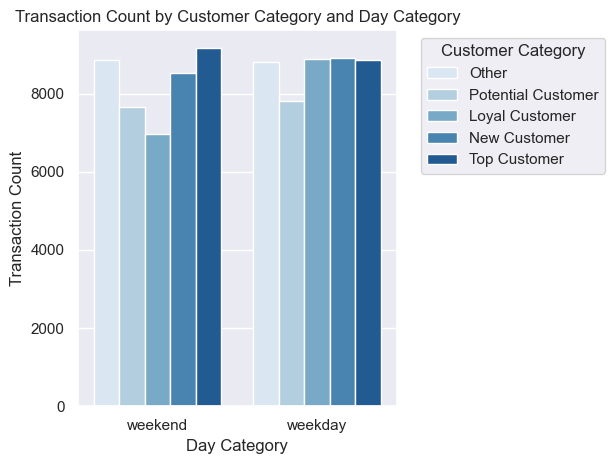

In [64]:
# Melakukan visualisasi karakteristik jenis customer berdasarkan kategori hari
my_palette = sns.color_palette('Blues', 5) 

sns.barplot(x='category_days', y='transactionid', hue='customer_type', data=df_analisi_rf, errorbar=None, palette=my_palette)

# Menambahkan label sumbu dan judul
plt.xlabel('Day Category')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Customer Category and Day Category')

# Menampilkan legenda di lokasi terbaik
plt.legend(title='Customer Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menyesuaikan layout plot
plt.tight_layout()

# Menampilkan plot
plt.show()

---
Insight:
- secara visual terlihat bahwa, untuk customer yang sering melakukan transaksi dan jumlah transaksinya banyak,  atau kita sebut sebagai top customer memiliki kecenderungan untuk melakukan transaksi lebih banyak di waktu weekend dibandingkan weekday. hal ini  agak berbeda dengan hasil visualisasi sebelumnya dimana saat weekday memiliki trend transaksi lebih tinggi dibandingkan weekend. 
- sebaliknya, customer-customer baru, customer loyal, dan potensial mereka memiliki kecenderungan melakukan transaksi lebih banyak di waktu weekday dibandingkan weekend yg sejalan pula dengan visual grafik sebelumnya. selain itu untuk customer lainnya baik weekend maupun weekday secara visual tidak jauh berbeda.
- Hasil pada kedua poin diatas, bisa dijadikan pertimbangan tim marketing yang ingin meningkatkan jumlah transaksi untuk mengadakan campaign sesuai dengan  perilaku transaksi setiap tipe customernya

In [72]:
transaction_counts

customer_type category_time  transaction_counts
0       Loyal Customer     dini hari                  93
1       Loyal Customer         malam                 150
2       Loyal Customer         siang                 112
3       Loyal Customer          sore                 262
4         New Customer     dini hari                 980
5         New Customer         malam                 940
6         New Customer          pagi                 476
7         New Customer         siang                 879
8         New Customer          sore                1630
9                Other     dini hari                3359
10               Other         malam                3140
11               Other          pagi                1343
12               Other         siang                2256
13               Other          sore                4940
14  Potential Customer     dini hari                  62
15  Potential Customer         malam                  28
16  Potential Customer         siang                  12
17  Potential Customer          sore                  70
18        Top Customer     dini hari                 257
19        Top Customer         malam                 482
20        Top Customer         siang                 273
21        Top Customer          sore                 713

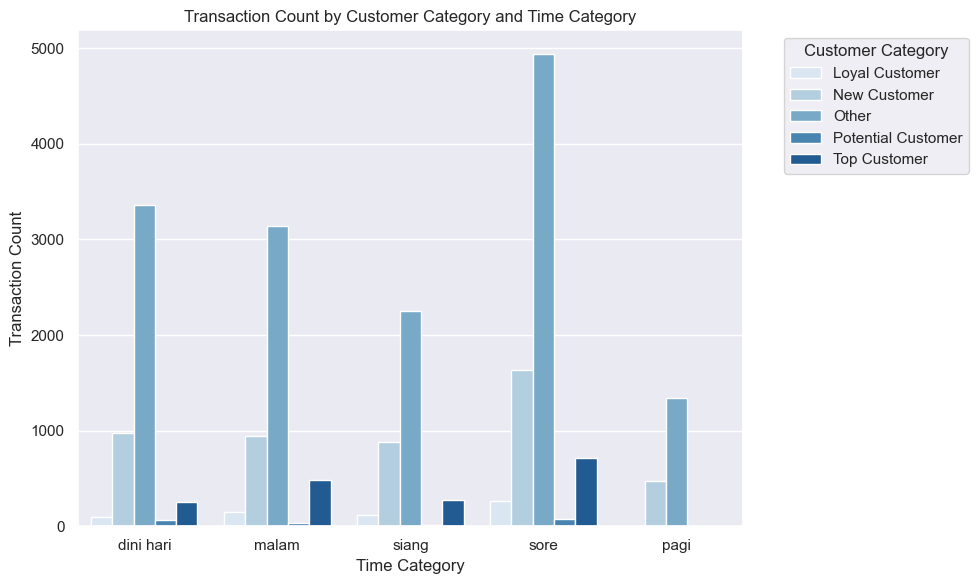

In [74]:
my_palette = sns.color_palette('Blues', 5) 

# Menggunakan seaborn untuk membuat bar plot dengan palet warna yang ditentukan
plt.figure(figsize=(10, 6))  # Ukuran gambar

# Menghitung jumlah transaksi berdasarkan kategori hari dan kategori pelanggan
transaction_counts = df_analisi_rf.groupby(['customer_type', 'category_time']).size().reset_index(name='transaction_counts')

sns.barplot(x='category_time', y='transaction_counts', hue='customer_type', data=transaction_counts, errorbar=None, palette=my_palette)

# Menambahkan label sumbu dan judul
plt.xlabel('Time Category')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Customer Category and Time Category')

# Menampilkan legenda di lokasi terbaik
plt.legend(title='Customer Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menyesuaikan layout plot
plt.tight_layout()

# Menampilkan plot
plt.show()

---
Insight:
- Berdasarkan visualisasi diatas, untuk semua tipe customer baik top customer, loyal customer, customer baru, customer potensial dan lainnya memang paling banyak melakukan transaksi disore hari. hal ini sejalan dengan trend transaksi berdasarkan waktu (grafik sebelumnya) yang menunjukkan waktu sore, kemudian dini hari dan malam  hari adalah waktu paling banyak melakukan transaksi

2. Membangkitkan top customer, customer loyal, dan potensial customer, dan new customer. semisal campaignya sukses, berapa total transaksi yang bisa dihasilkan selama 1 bulan kedepan

In [82]:
df_analisi_rf

visitorid                datetime customer_type  transactionid  \
0         869008 2015-05-03 03:27:21.391         Other         9765.0   
1         345781 2015-05-03 03:35:01.772         Other         1016.0   
2         586756 2015-05-03 04:01:47.591         Other        10942.0   
3         435495 2015-05-03 04:07:38.961         Other         6173.0   
4         266417 2015-05-03 04:31:14.903         Other        12546.0   
...          ...                     ...           ...            ...   
22452     152963 2015-09-17 15:11:02.163  Top Customer        12673.0   
22453     152963 2015-09-18 00:45:03.196  Top Customer         2553.0   
22454     152963 2015-09-17 15:45:32.544  Top Customer        13895.0   
22455     152963 2015-09-18 02:08:16.481  Top Customer         5772.0   
22456     152963 2015-09-18 02:08:16.481  Top Customer         5772.0   

        date_key category_days category_time  
0     2015-05-03       weekend     dini hari  
1     2015-05-03       weekend     dini hari  
2     2015-05-03       weekend     dini hari  
3     2015-05-03       weekend     dini hari  
4     2015-05-03       weekend     dini hari  
...          ...           ...           ...  
22452 2015-09-17       weekday         siang  
22453 2015-09-18       weekday     dini hari  
22454 2015-09-17       weekday         siang  
22455 2015-09-18       weekday     dini hari  
22456 2015-09-18       weekday     dini hari  

[22457 rows x 7 columns]

In [83]:
# Lakukan filter untuk step pertama kriteria Dormant
target_customer=df_analisi_rf[(df_analisi_rf['customer_type'].isin(['Top Customer','New Customer','Loyal Customer','Potential Customer']))]
target_customer

visitorid                datetime       customer_type  transactionid  \
10603     519839 2015-07-07 20:46:58.579  Potential Customer         2143.0   
10604     519839 2015-07-07 20:46:58.610  Potential Customer         2143.0   
10605     519839 2015-07-08 03:07:00.239  Potential Customer         8952.0   
10606     519839 2015-07-08 03:07:00.239  Potential Customer         8952.0   
10607     519839 2015-07-07 20:23:55.249  Potential Customer         3915.0   
...          ...                     ...                 ...            ...   
22452     152963 2015-09-17 15:11:02.163        Top Customer        12673.0   
22453     152963 2015-09-18 00:45:03.196        Top Customer         2553.0   
22454     152963 2015-09-17 15:45:32.544        Top Customer        13895.0   
22455     152963 2015-09-18 02:08:16.481        Top Customer         5772.0   
22456     152963 2015-09-18 02:08:16.481        Top Customer         5772.0   

        date_key category_days category_time  
10603 2015-07-07       weekday          sore  
10604 2015-07-07       weekday          sore  
10605 2015-07-08       weekday     dini hari  
10606 2015-07-08       weekday     dini hari  
10607 2015-07-07       weekday          sore  
...          ...           ...           ...  
22452 2015-09-17       weekday         siang  
22453 2015-09-18       weekday     dini hari  
22454 2015-09-17       weekday         siang  
22455 2015-09-18       weekday     dini hari  
22456 2015-09-18       weekday     dini hari  

[7419 rows x 7 columns]

In [84]:
# Lakukan filter untuk step pertama kriteria Dormant
target_customer=df_analisi_rf[(df_analisi_rf['customer_type'].isin(['Top Customer','New Customer','Loyal Customer','Potential Customer']))]
target_customer

visitorid                datetime       customer_type  transactionid  \
10603     519839 2015-07-07 20:46:58.579  Potential Customer         2143.0   
10604     519839 2015-07-07 20:46:58.610  Potential Customer         2143.0   
10605     519839 2015-07-08 03:07:00.239  Potential Customer         8952.0   
10606     519839 2015-07-08 03:07:00.239  Potential Customer         8952.0   
10607     519839 2015-07-07 20:23:55.249  Potential Customer         3915.0   
...          ...                     ...                 ...            ...   
22452     152963 2015-09-17 15:11:02.163        Top Customer        12673.0   
22453     152963 2015-09-18 00:45:03.196        Top Customer         2553.0   
22454     152963 2015-09-17 15:45:32.544        Top Customer        13895.0   
22455     152963 2015-09-18 02:08:16.481        Top Customer         5772.0   
22456     152963 2015-09-18 02:08:16.481        Top Customer         5772.0   

        date_key category_days category_time  
10603 2015-07-07       weekday          sore  
10604 2015-07-07       weekday          sore  
10605 2015-07-08       weekday     dini hari  
10606 2015-07-08       weekday     dini hari  
10607 2015-07-07       weekday          sore  
...          ...           ...           ...  
22452 2015-09-17       weekday         siang  
22453 2015-09-18       weekday     dini hari  
22454 2015-09-17       weekday         siang  
22455 2015-09-18       weekday     dini hari  
22456 2015-09-18       weekday     dini hari  

[7419 rows x 7 columns]

In [85]:
# Uji coba sampel customer
trx_history=df.query('visitorid == 548772').groupby('date_key')['transactionid'].count()
trx_history

date_key
2015-06-18     16
2015-06-19    138
2015-06-20     74
2015-06-23     21
2015-06-24    117
2015-06-25    134
2015-06-26     89
2015-07-29     86
2015-07-30     72
2015-07-31     65
Name: transactionid, dtype: int64

In [95]:
# Melakukan analisis
# 1. Rata rata perhari 
# 2. dikalikan sebulan
# Melakukan reindex artinya tanggal tanggal yang tidak terisi semua dimasukkan sehingga
# jika pada tanggal tertentu tidak ada transaksai maka valuenya Nan
# Nan diisikan dengan nol

# Transaksi per hari
date_index_complete=pd.date_range(trx_history.index.min(),trx_history.index.max())
trx_history=trx_history.reindex(date_index_complete).fillna(0)
print('rat-rata jumlah transaksi per hari:',trx_history.mean()) # menghitung rataan per hari

rat-rata jumlah transaksi per hari: 1.0


In [98]:
# Melakukan iterasi untuk setiap customer
list_output=[]
for customer,row in target_customer.iterrows():
    trx_history=df.query('visitorid==@customer').groupby('date_key')['transactionid'].count()
    date_index_complete=pd.date_range(trx_history.index.min(),trx_history.index.max())
    trx_history=trx_history.reindex(date_index_complete).fillna(0)
    list_output.append(trx_history.mean())
# @customer diambil dari nama for customer

In [99]:
import numpy as np
# Jumlah rata rata perhari
print("jumlah transaksi bertambah:",np.array(list_output).sum()*0.2)

# asumsi bahwa tim marketing berhasil membangkitkan sebanyak 20% target_customer melakukan transaksai

jumlah transaksi bertambah: 2112.024079202221


---
### Kesimpulan 
---
poin 1 : Berdasarkan Waktu
- Berdasarkan jenis waktu
    - pagi hari adalalah waktu pengunjung melakukan paling sedikit transaksi
    - sedangkan waktu yang lebih banyak pengunjung yang melakukan transaksi terjadi pada waktu sore yang disusul pula dini hari dan kemudian malam
Hal ini dimungkinkan waktu pagi dan siang hari adalah waktu dimana orang orang sibuk bekerja dan beraktivitas sehingga sedikit orang orang yang melakukan transaksi mereka hanya sekedar view (lihat grafik sebelumnya viewnya cenderung konstan, kecuali pada akhir september). namun bisa pula dimungkinkan waktu waktu tersebut adalah waktu dimana trafficnya tinggi sehingga perlu dicari info lebih lanjut dari data lain apakah ada masalah debug web akibat traffic tinggi.
- Berdasarkan Bulan
  - conversion bulan Mei lebih tinggi dibandingkan bulan September. Dari hal tersebut ada yang tidak wajar dan perlu diselidiki karena ada penurunan drastis yang terjadi khususnya pada akhir september
- berdasarkan kategori hari weekend or weekday
  - secara visual, waktu weekday lebih banyak pengunjung yang melakukan transaksi dibandingkan dengan waktu weekend padahal weekend biasanya menunjukkan waktu orang-orang bersantai dan banyak memiliki waktu luang dibandingkan weekday (hari kerja). Hal ini menambah asumsi kemungkinan apakah ada kaitannya dengan trafic dimana jika waktu weekend diasumsikan traffic tinggi. dan traffic tinggi sering menimbulkan masalah debug atau loading yang terlalu lama pada web. perlu dicari info tambahan selain data event ini misal waktu campaign, usia pengunjung, akses device yang digunakan, income, atau pekerjaan

---
poin 2 : Berdasarkan Tipe Customer
- top customer memiliki kecenderungan untuk melakukan transaksi lebih banyak di waktu weekend dan waktu sore serta malam hari 
- Loyal Customer memiliki kecenderungan untuk melakukan transasksi lebih banyak diwaktu weekday dan di sore serta dini hari 
- New Customer memiliki kecenderungan untuk melakukan transasksi lebih banyak diwaktu weekday dan di sore serta dini hari 
-  Potensial Customer memiliki kecenderungan untuk melakukan transasksi lebih banyak diwaktu weekday dan di sore serta dini hari 
- Customer Lainnya memiliki kecenderungan untuk melakukan transasksi lebih banyak sore serta dini hari namun tidak begitu jauh berbeda baik weekend maupun weekday  
- Hasil pada kedua poin diatas, bisa dijadikan pertimbangan tim marketing yang ingin meningkatkan jumlah transaksi untuk mengadakan campaign sesuai dengan  perilaku transaksi setiap tipe customernya

---
poin 3: Potensial Marketing
- asumsi bahwa tim marketing berhasil membangkitkan sebanyak 20% target_customer (Top, Loyal, New, dan Potensial) untuk meningkatkan jumlah transaksasi mereka maka diperkiraakan jumlah transaksi akan bertambah sebanyak 2.112 transaksi